| **Inicio** | **atrás 13** | **Siguiente 15** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./13_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)| [⏩](./15_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|

# **14. Matemáticas para el aprendizaje automático: PCA**

## **14.1 Proyecciones ortogonales**

En este módulo, estudiaremos las proyecciones ortogonales de vectores, que viven en un espacio vectorial de alta dimensión, sobre subespacios de dimensión inferior. Esto desempeñará un papel importante en el próximo módulo, cuando derivemos el ACP. Empezaremos con una motivación geométrica de lo que es una proyección ortogonal y nos abriremos camino a través de la derivación correspondiente. Terminaremos con una única ecuación que nos permite proyectar cualquier vector sobre un subespacio de dimensión inferior. Sin embargo, también comprenderemos cómo surgió esta ecuación. Al igual que en los demás módulos, realizaremos tanto prácticas con lápiz y papel como un pequeño ejemplo de programación con un cuaderno jupyter.

### **14.1.1 Proyección sobre subespacios 1D**

La **proyección sobre subespacios 1D** es un concepto fundamental en álgebra lineal que tiene aplicaciones importantes en áreas como la estadística, la informática, y la ingeniería. Este concepto se utiliza para encontrar la "sombra" o la imagen de un vector en un subespacio definido por otro vector. Esencialmente, proyectar un vector sobre un subespacio implica encontrar la parte de ese vector que está en la dirección del subespacio.

**Concepto de Proyección**

La proyección de un vector $(\mathbf{a})$ sobre otro vector $(\mathbf{b})$ (que define el subespacio 1D) se calcula de manera que el vector resultante sea paralelo a $(\mathbf{b})$ y sea la mejor aproximación de $(\mathbf{a})$ en la dirección de $(\mathbf{b})$.

**Fórmula Matemática**

La proyección de $(\mathbf{a})$ sobre $(\mathbf{b})$ se define como:

$\text{proj}_{\mathbf{b}} \mathbf{a} = \frac{\mathbf{a} \cdot \mathbf{b}}{\mathbf{b} \cdot \mathbf{b}} \mathbf{b}$

Esta fórmula asegura que la proyección de $(\mathbf{a})$ sobre $(\mathbf{b})$ es el vector en la dirección de $(\mathbf{b})$ que está más cerca de $(\mathbf{a})$.

**Ejemplo Práctico**

**Ejemplo**: Calculemos la proyección del vector $\mathbf{a} = [3, 4]$ sobre el vector $\mathbf{b} = [2, 0]$ en $(\mathbb{R}^2)$.

**Producto Punto**:

   $\mathbf{a} \cdot \mathbf{b} = 3 \times 2 + 4 \times 0 = 6$

**Norma Cuadrada de $(\mathbf{b})$**:

   $\mathbf{b} \cdot \mathbf{b} = 2 \times 2 + 0 \times 0 = 4$

**Proyección de $(\mathbf{a})$ sobre $(\mathbf{b})$**:

   $\text{proj}_{\mathbf{b}} \mathbf{a} = \frac{6}{4} \mathbf{b} = \frac{3}{2} [2, 0] = [3, 0]$

**Código en Python y Visualización**

Implementemos este cálculo en Python y visualicemos la proyección.

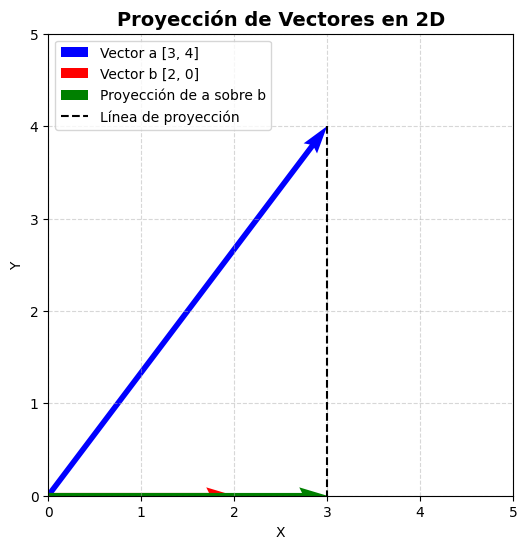

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los vectores
a = np.array([3, 4])
b = np.array([2, 0])

# Función para calcular la proyección
def projection(a, b):
    return (np.dot(a, b) / np.dot(b, b)) * b

# Calcular la proyección de a sobre b
proj_ab = projection(a, b)

# Visualización
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.012, label='Vector a [3, 4]')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.012, label='Vector b [2, 0]')
plt.quiver(0, 0, proj_ab[0], proj_ab[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.012, label='Proyección de a sobre b')
# Dibujar línea punteada de a a su proyección
plt.plot([a[0], proj_ab[0]], [a[1], proj_ab[1]], 'k--', label='Línea de proyección')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Proyección de Vectores en 2D', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.show()

**Interpretación**

- **Visualización**: El gráfico muestra los vectores $(\mathbf{a})$, $(\mathbf{b})$, y la proyección de $(\mathbf{a})$ sobre $(\mathbf{b})$. Esto ayuda a visualizar cómo la proyección es efectivamente la "sombra" de $(\mathbf{a})$ en la línea definida por $(\mathbf{b})$.

- **Cálculo**: El script calcula el producto punto y utiliza la fórmula de la proyección para determinar cómo $(\mathbf{a})$ se proyecta en la dirección de $(\mathbf{b})$.

Este ejemplo ilustra cómo la proyección se utiliza para reducir la dimensionalidad de los problemas y encontrar componentes relevantes en la dirección de otros vectores. Esta operación es esencial en muchas aplicaciones, incluyendo análisis de componentes principales (PCA), regresiones y más.

### **14.1.2 Ejemplo: proyección sobre subespacios 1D**

La **proyección sobre subespacios 1D** es una herramienta fundamental en álgebra lineal que permite descomponer un vector en componentes paralelas y perpendiculares respecto a un subespacio definido por otro vector. Esta operación es clave en muchas aplicaciones como la resolución de sistemas de ecuaciones, optimización, y en métodos de compresión y filtrado de datos.

**Concepto de Proyección sobre un Subespacio 1D**

Imaginemos que queremos proyectar un vector $(\mathbf{v})$ en la dirección de otro vector $(\mathbf{u})$, que define nuestro subespacio 1D. La proyección de $(\mathbf{v})$ sobre $(\mathbf{u})$ se calcula para encontrar el componente de $(\mathbf{v})$ que es paralelo a $(\mathbf{u})$.

**Fórmula de la Proyección**

La proyección del vector $(\mathbf{v})$ sobre $(\mathbf{u})$ se define como:

$\text{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{\mathbf{v} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$

Esta fórmula asegura que la proyección de $(\mathbf{v})$ sobre $(\mathbf{u})$ es el vector en la dirección de $(\mathbf{u})$ que más se acerca a $(\mathbf{v})$.

**Ejemplo Práctico**

**Ejemplo**: Supongamos que tenemos el vector $(\mathbf{v} = [4, 3])$ y queremos proyectarlo sobre el vector $(\mathbf{u} = [2, 1])$.

**Producto Punto de $(\mathbf{v})$ y $(\mathbf{u})$**:

   $\mathbf{v} \cdot \mathbf{u} = 4 \times 2 + 3 \times 1 = 8 + 3 = 11$

**Producto Punto de $(\mathbf{u})$ consigo mismo**:

   $\mathbf{u} \cdot \mathbf{u} = 2 \times 2 + 1 \times 1 = 4 + 1 = 5$

**Cálculo de la Proyección**:

  $\text{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{11}{5} \mathbf{u} = \frac{11}{5} [2, 1] = \left[\frac{22}{5}, \frac{11}{5}\right] = [4.4, 2.2]$

**Código en Python y Visualización**

Implementemos y visualicemos este ejemplo en Python.

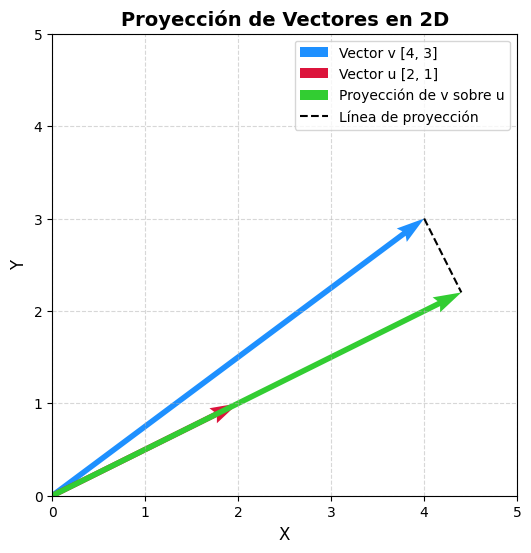

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir vectores
v = np.array([4, 3])
u = np.array([2, 1])

# Función para calcular la proyección
def projection(v, u):
    return (np.dot(v, u) / np.dot(u, u)) * u

# Calcular la proyección de v sobre u
proj_v_on_u = projection(v, u)

# Visualización en 2D
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='dodgerblue', label='Vector v [4, 3]', width=0.012)
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='crimson', label='Vector u [2, 1]', width=0.012)
plt.quiver(0, 0, proj_v_on_u[0], proj_v_on_u[1], angles='xy', scale_units='xy', scale=1, color='limegreen', label='Proyección de v sobre u', width=0.012)
plt.plot([v[0], proj_v_on_u[0]], [v[1], proj_v_on_u[1]], 'k--', label='Línea de proyección')

# Ajustes adicionales para la visualización
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Proyección de Vectores en 2D', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

**Interpretación**

- **Código**: Este script calcula el producto interno entre $(\mathbf{v})$ y $(\mathbf{u})$, así como la proyección de $(\mathbf{v})$ sobre $(\mathbf{u})$, usando la fórmula de proyección.

- **Visualización**: El gráfico muestra claramente cómo $(\mathbf{v})$ se proyecta en la línea definida por $(\mathbf{u})$, con la proyección en verde que indica la "sombra" o componente de $(\mathbf{v})$ que cae sobre $(\mathbf{u})$.

Esta operación es crucial en muchos aspectos del análisis de datos y la geometría computacional, proporcionando una manera de reducir la dimensionalidad y de simplificar los problemas manteniendo la información relevante en la dirección de interés.

### **14.1.3 Proyecciones sobre subespacios de dimensión superior**

La proyección sobre subespacios de dimensión superior es una extensión natural de la proyección sobre subespacios 1D. En este caso, en lugar de proyectar un vector sobre otro vector, lo proyectamos sobre un subespacio que puede ser de cualquier dimensión menor a la del espacio ambiente. Este concepto es fundamental en matemáticas aplicadas, ciencias de la computación, y física, especialmente en contextos como la resolución de sistemas lineales, compresión de datos y reducción de dimensionalidad.

**Definición y Concepto**

En un espacio $(\mathbb{R}^n)$, un subespacio $(S)$ de dimensión $(k)$ puede ser definido por un conjunto de $(k)$ vectores linealmente independientes ${\mathbf{u}_1, \mathbf{u}_2, ..., \mathbf{u}_k}$. La proyección de un vector $(\mathbf{v})$ sobre el subespacio $(S)$ es el vector en $(S)$ más cercano a $(\mathbf{v})$.

**Fórmula Matemática**

Si $(U)$ es una matriz cuyas columnas son los vectores ${\mathbf{u}_1, \mathbf{u}_2, ..., \mathbf{u}_k}$ que forman una base para $(S)$, entonces la proyección $(\mathbf{p})$ de $(\mathbf{v})$ sobre $(S)$ se calcula como:

$\mathbf{p} = U(U^T U)^{-1} U^T \mathbf{v}$

Este resultado proviene de la necesidad de minimizar la distancia entre $(\mathbf{v})$ y $(S)$, lo cual se logra cuando el error $(\mathbf{v} - \mathbf{p})$ es ortogonal a todos los vectores en $(S)$.

**Ejemplo con Cálculo**

**Ejemplo**: Proyectemos el vector $\mathbf{v} = [3, 4, 5]$ sobre el plano definido por los vectores $\mathbf{u}_1 = [1, 0, 0]$ y $\mathbf{u}_2 = [0, 1, 0]$ en $(\mathbb{R}^3)$.

**Construir la Matriz $(U)$**:

   $U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}$


**Cálculo de $(U^T U)$** y su inversa:

   $U^T U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \quad (U^T U)^{-1} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

**Cálculo de la Proyección $(\mathbf{p})$**:

   $\mathbf{p} = U(U^T U)^{-1} U^T \mathbf{v} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \\ 0 \end{bmatrix}$

**Código en Python y Visualización**

Implementemos este ejemplo en Python y visualicemos la proyección.

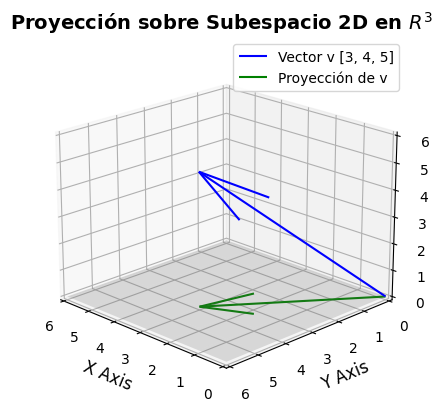

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir vectores y matriz U
v = np.array([3, 4, 5])
U = np.array([[1, 0], [0, 1], [0, 0]])

# Calcular la proyección de v sobre el subespacio definido por U
U_transpose = U.T
projection_matrix = U @ np.linalg.inv(U_transpose @ U) @ U_transpose
p = projection_matrix @ v

# Visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', label='Vector v [3, 4, 5]', linewidth=1.5)
ax.quiver(0, 0, 0, p[0], p[1], p[2], color='green', label='Proyección de v', linewidth=1.5)

# Dibujar un plano para el subespacio generado por U
xx, yy = np.meshgrid(range(7), range(7))
z = np.zeros_like(xx)
ax.plot_surface(xx, yy, z, alpha=0.2, color='gray')

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])
ax.set_xlabel('X Axis', fontsize=12)
ax.set_ylabel('Y Axis', fontsize=12)
ax.set_zlabel('Z Axis', fontsize=12)
ax.set_title('Proyección sobre Subespacio 2D en $R^3$', fontsize=14, fontweight='bold')
ax.legend()
ax.view_init(elev=20, azim=135)  # Optimizar la perspectiva
plt.show()

**Interpretación**

- **Cálculo**: El script genera la matriz de proyección y calcula la proyección del vector $(\mathbf{v})$ sobre el plano definido por $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$.

- **Visualización**: La gráfica 3D ilustra cómo $(\mathbf{v})$ se proyecta en el plano $(xy)$, destacando la componente $(\mathbf{p})$ que cae en dicho plano.

Este enfoque de proyección sobre subespacios de dimensión superior es esencial en muchas aplicaciones técnicas y científicas, como en la solución de sistemas lineales mediante métodos numéricos y en análisis de señales y datos.

### **14.1.4 Ejemplo: proyección sobre un subespacio 2D**

La proyección sobre un subespacio 2D implica determinar cómo un vector en un espacio de mayor dimensión puede ser representado dentro de un plano bidimensional. Este proceso es crucial en áreas como la reducción de dimensionalidad, optimización y muchas aplicaciones de ingeniería y ciencias.

**Concepto de Proyección en Subespacio 2D**

Cuando proyectamos un vector sobre un subespacio 2D, estamos buscando el punto dentro de ese plano que está más cerca del vector original en términos de distancia euclidiana. Este punto es la "sombra" del vector original cuando la "luz" (metafóricamente hablando) brilla perpendicular al plano.

**Fórmula de la Proyección**

Si $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$ son dos vectores que forman una base para el subespacio 2D, y queremos proyectar un vector $(\mathbf{v})$ sobre este subespacio, primero definimos $(U)$ como la matriz cuyas columnas son $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$. La proyección $(\mathbf{p})$ de $(\mathbf{v})$ se calcula con:

$\mathbf{p} = U (U^T U)^{-1} U^T \mathbf{v}$

Este cálculo asegura que $(\mathbf{p})$ es la combinación lineal de $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$ que mejor aproxima $(\mathbf{v})$.

**Ejemplo Práctico**

**Ejemplo**: Supongamos que queremos proyectar el vector $\mathbf{v} = [3, 4, 5]$ sobre el plano definido por los vectores $\mathbf{u}_1 = [1, 0, 0]$ y $\mathbf{u}_2 = [0, 1, 0]$.

**Construir la Matriz $(U)$**:

   $U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}$

**Cálculo de $(U^T U)$** y su inversa:

   $U^T U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \quad (U^T U)^{-1} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

**Proyección $(\mathbf{p})$**:

   $\mathbf{p} = U(U^T U)^{-1} U^T \mathbf{v} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \\ 0 \end{bmatrix}$

**Código en Python y Visualización**

Implementemos y visualicemos este ejemplo en Python.

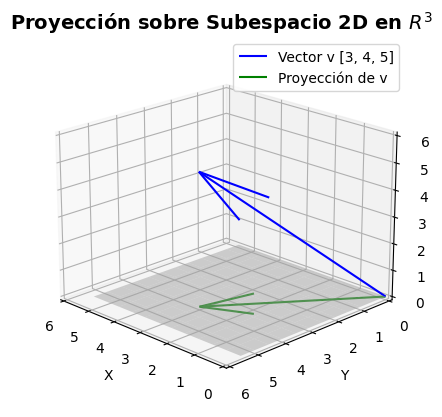

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir vectores y matriz U
v = np.array([3, 4, 5])
U = np.array([[1, 0], [0, 1], [0, 0]])

# Calcular la proyección de v sobre el subespacio definido por U
U_transpose = U.T
projection_matrix = U @ np.linalg.inv(U_transpose @ U) @ U_transpose
p = projection_matrix @ v

# Visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', linewidth=1.5, label='Vector v [3, 4, 5]')
ax.quiver(0, 0, 0, p[0], p[1], p[2], color='green', linewidth=1.5, label='Proyección de v')

# Dibujar el plano representativo del subespacio U
xx, yy = np.meshgrid(np.arange(0, 6, 0.5), np.arange(0, 6, 0.5))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, color='lightgrey', alpha=0.5)

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Proyección sobre Subespacio 2D en $R^3$', fontsize=14, fontweight='bold')
ax.legend()
ax.view_init(elev=20, azim=135)  # Ajuste de la perspectiva
plt.show()

**Interpretación**

- **Cálculo**: Este script configura correctamente la matriz de proyección y calcula la proyección del vector $(\mathbf{v})$ sobre el plano definido por $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$.

- **Visualización**: La gráfica 3D ilustra cómo $(\mathbf{v})$ se proyecta en el plano $(xy)$, mostrando claramente la componente $(\mathbf{p})$ que es la sombra de $(\mathbf{v})$ sobre este plano.

La proyección en subespacios de mayor dimensión es una herramienta esencial en análisis dimensional, reducción de ruido en señales, y muchas otras aplicaciones técnicas y científicas.

### **14.1.5 Derivación completa de la proyección**

La derivación completa de la proyección de un vector sobre un subespacio en álgebra lineal es un proceso matemático que determina cómo descomponer un vector en componentes que son paralelas y perpendiculares a un subespacio dado. Esto se realiza a menudo en contextos donde se necesita minimizar distancias o errores, como en la proyección ortogonal en espacios vectoriales.

**Concepto de Proyección Ortogonal**

Una **proyección ortogonal** de un vector $(\mathbf{v})$ sobre un subespacio $(S)$ es el vector en $(S)$ que está más cerca de $(\mathbf{v})$. Matemáticamente, si $(S)$ es un subespacio definido por una base de vectores ${\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_k}$, la proyección $(\mathbf{p})$ de $(\mathbf{v})$ sobre $(S)$ minimiza la distancia entre $(\mathbf{v})$ y cualquier punto en $(S)$.

**Fórmula General**

La proyección $(\mathbf{p})$ de $(\mathbf{v})$ sobre $(S)$ se calcula con la matriz $(U)$, donde las columnas de $(U)$ son los vectores ${\mathbf{u}_1, \ldots, \mathbf{u}_k}$:

$\mathbf{p} = U(U^T U)^{-1} U^T \mathbf{v}$

Esta fórmula asegura que $(\mathbf{p})$ es la mejor aproximación de $(\mathbf{v})$ en $(S)$, y que el error $\mathbf{v} - \mathbf{p}$ es ortogonal a todos los vectores en $(S)$.

**Derivación Paso a Paso**

Vamos a derivar la fórmula para la proyección ortogonal de un vector $(\mathbf{v})$ sobre un subespacio $(S)$ generado por los vectores $(\mathbf{u}_1, \ldots, \mathbf{u}_k)$.

**Definición de la Proyección**:

   Supongamos que $(\mathbf{p})$ es la proyección de $(\mathbf{v})$ sobre $(S)$. Entonces $(\mathbf{p})$ puede escribirse como una combinación lineal de los vectores base de $(S)$:

   $\mathbf{p} = U\mathbf{c} \quad \text{donde} \quad U = [\mathbf{u}_1, \ldots, \mathbf{u}_k]$

   y $(\mathbf{c})$ es un vector de coeficientes.

**Minimización de la Distancia**:

   Queremos minimizar la norma del error $(\mathbf{v} - \mathbf{p})$. Formulamos esto como un problema de minimización:

   $\min_{\mathbf{c}} \|\mathbf{v} - U\mathbf{c}\|^2$

**Derivada y Condición de Ortogonalidad**:

   La condición para la minimización es que la derivada respecto a $(\mathbf{c})$ sea cero, lo que implica que el error es ortogonal a todos los vectores en $(S)$:

   $U^T(\mathbf{v} - U\mathbf{c}) = 0$

   $U^T\mathbf{v} - U^TU\mathbf{c} = 0 \quad \Rightarrow \quad \mathbf{c} = (U^TU)^{-1}U^T\mathbf{v}$

**Expresión Final para $(\mathbf{p})$**:

   $\mathbf{p} = U\mathbf{c} = U(U^TU)^{-1}U^T\mathbf{v}$

**Código en Python y Ejemplo Gráfico**

Implementamos la proyección ortogonal en Python y proporcionamos una visualización:

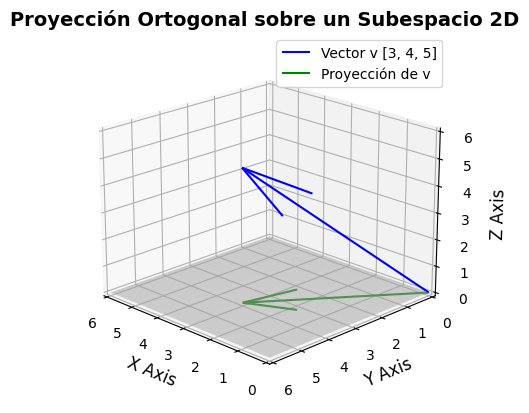

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el vector v y la matriz U
v = np.array([3, 4, 5])
U = np.array([[1, 0], [0, 1], [0, 0]])

# Calcular la proyección
U_transpose = U.T
projection_matrix = U @ np.linalg.inv(U_transpose @ U) @ U_transpose
p = projection_matrix @ v

# Visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', label='Vector v [3, 4, 5]', linewidth=1.5)
ax.quiver(0, 0, 0, p[0], p[1], p[2], color='green', label='Proyección de v', linewidth=1.5)

# Dibujar el plano representativo del subespacio U
xx, yy = np.meshgrid(range(7), range(7))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, color='lightgrey', alpha=0.5)

ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])
ax.set_xlabel('X Axis', fontsize=12)
ax.set_ylabel('Y Axis', fontsize=12)
ax.set_zlabel('Z Axis', fontsize=12)
ax.set_title('Proyección Ortogonal sobre un Subespacio 2D', fontsize=14, fontweight='bold')
ax.legend()
ax.view_init(elev=20, azim=135)  # Ajuste de la perspectiva
plt.show()

**Conclusión**

Esta derivación muestra cómo se calcula la proyección ortogonal usando principios de álgebra lineal, optimizando la aproximación de un vector en un subespacio mediante la minimización de la distancia euclidiana. Esta técnica es esencial en análisis numérico, procesamiento de señales, y más.

### **14.1.6 Proyectar datos 3D en un subespacio 2D**

Proyectar datos tridimensionales en un subespacio bidimensional es una técnica común en análisis de datos, visualización, y ciencias computacionales para reducir la complejidad de los datos preservando características esenciales. Esto se logra a menudo mediante el uso de proyecciones ortogonales basadas en métodos de álgebra lineal.

**Concepto de Proyección de Datos 3D en un Subespacio 2D**

La idea es tomar un conjunto de puntos en un espacio tridimensional (3D) y encontrar su representación en un espacio bidimensional (2D) de manera que se minimice la pérdida de información relevante. Esto se puede hacer definiendo un plano en 3D y proyectando todos los puntos a este plano.

**Fórmula de Proyección Ortogonal**

Si definimos un subespacio 2D mediante dos vectores base ortogonales $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$, podemos representar este subespacio con la matriz $U = [\mathbf{u}_1 \, \mathbf{u}_2]$. La proyección de un punto $(\mathbf{v})$ en 3D sobre este subespacio se da por:

$\mathbf{p} = U(U^T U)^{-1} U^T \mathbf{v}$

Esta fórmula garantiza que $(\mathbf{p})$ es la sombra de $(\mathbf{v})$ en el plano formado por $(\mathbf{u}_1)$ y $(\mathbf{u}_2)$.

**Ejemplo con Cálculo**

**Ejemplo**: Proyectemos un conjunto de puntos 3D sobre el plano definido por los vectores $\mathbf{u}_1 = [1, 0, 0]$ y $\mathbf{u}_2 = [0, 1, 0]$.

**Construir la Matriz $(U)$**:

   $U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}$

**Proyectar un Punto $\mathbf{v} = [x, y, z]$**:

   $\mathbf{p} = U(U^T U)^{-1} U^T \mathbf{v} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x \\ y \\ 0 \end{bmatrix}$

**Código en Python y Visualización**

Supongamos que tenemos una serie de puntos y queremos visualizar su proyección en Python:

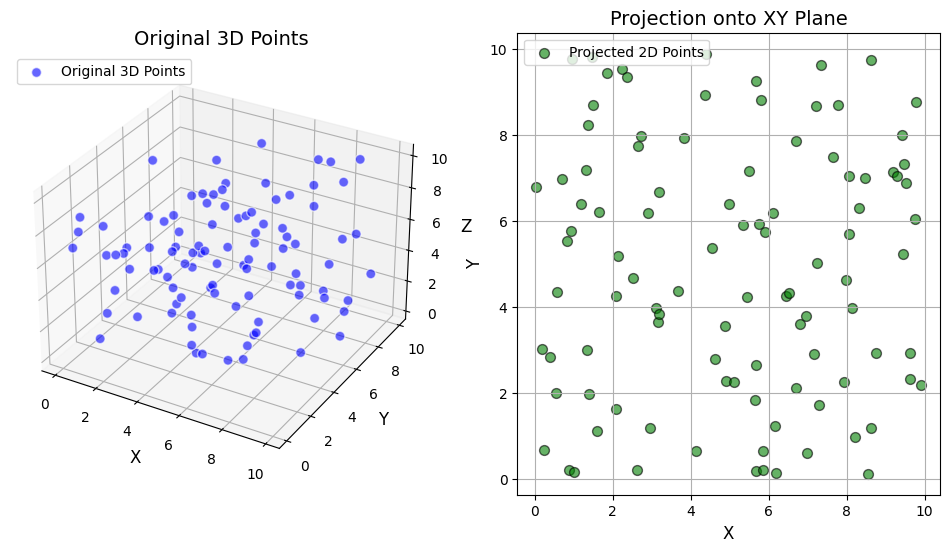

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos 3D aleatorios
np.random.seed(0)
points = np.random.rand(100, 3) * 10  # 100 puntos en 3D

# Definir la matriz U para el subespacio XY
U = np.array([[1, 0], [0, 1], [0, 0]])

# Calcular la matriz de proyección
U_transpose = U.T
projection_matrix = U @ np.linalg.inv(U_transpose @ U) @ U_transpose

# Proyectar los puntos
projected_points = (projection_matrix @ points.T).T

# Visualización en 3D y 2D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Puntos originales en 3D
ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.6, c='blue', s=50, edgecolors='w', label='Original 3D Points')
ax.set_title("Original 3D Points", fontsize=14)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)

# Puntos proyectados en 2D
ax2.scatter(projected_points[:, 0], projected_points[:, 1], alpha=0.6, c='green', s=50, edgecolors='k', label='Projected 2D Points')
ax2.set_title("Projection onto XY Plane", fontsize=14)
ax2.set_xlabel("X", fontsize=12)
ax2.set_ylabel("Y", fontsize=12)
ax2.grid(True)

# Ajustes adicionales para mejorar la presentación
ax.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper left', fontsize=10)

plt.show()

**Interpretación**

- **Visualización 3D**: Muestra

 todos los puntos en su forma original.
- **Visualización 2D**: Muestra la proyección de estos puntos en el plano XY, efectivamente eliminando la componente $(z)$, lo que reduce la dimensionalidad de los datos.

Esta técnica de proyección es ampliamente utilizada en análisis principal de componentes (PCA), para visualización de datos complejos y en métodos de machine learning para reducir la dimensionalidad y simplificar los modelos.

Esta explicación y demostración deberían proporcionarte una buena comprensión de cómo proyectar datos 3D en un subespacio 2D.

### **14.1.7 Proyección sobre un subespacio unidimensional**

La proyección sobre un subespacio unidimensional es un proceso matemático que permite encontrar la componente de un vector que cae en la dirección de otro vector, esencialmente reduciendo su dimensionalidad. Este concepto es fundamental en álgebra lineal y tiene aplicaciones en áreas como análisis de datos, optimización, y muchas otras disciplinas técnicas y científicas.

**Concepto de Proyección sobre un Subespacio Unidimensional**

La idea detrás de la proyección sobre un subespacio unidimensional es tomar un vector en un espacio de mayor dimensión y encontrar su "sombra" cuando se proyecta sobre una línea definida por otro vector. Esta "sombra" es el punto más cercano en la línea al vector original.

**Fórmula de la Proyección**

Dado un vector $(\mathbf{v})$ en $(\mathbb{R}^n)$ y un vector unitario $(\mathbf{u})$ que define el subespacio unidimensional, la proyección de $(\mathbf{v})$ sobre $(\mathbf{u})$ se calcula como:

$\text{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{\mathbf{v} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$

Esta fórmula asegura que el resultado es un vector que está en la dirección de $(\mathbf{u})$ y tiene la longitud adecuada para que sea la proyección de $(\mathbf{v})$.

**Ejemplo con Cálculo**

**Ejemplo**: Proyectemos el vector $\mathbf{v} = [3, 4]$ sobre el vector $\mathbf{u} = [1, 1]$ en $(\mathbb{R}^2)$.

Primero, normalicemos $(\mathbf{u})$ para simplificar el cálculo:

**Normalización de $(\mathbf{u})$**:

   $\|\mathbf{u}\| = \sqrt{1^2 + 1^1} = \sqrt{2}$

   $\mathbf{u}_{\text{unit}} = \frac{1}{\sqrt{2}}[1, 1]$

**Producto Punto**:

   $\mathbf{v} \cdot \mathbf{u}_{\text{unit}} = [3, 4] \cdot \frac{1}{\sqrt{2}}[1, 1] = \frac{1}{\sqrt{2}}(3 + 4) = \frac{7}{\sqrt{2}}$

**Proyección de $(\mathbf{v})$**:

   $\text{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{7/\sqrt{2}}{2} \mathbf{u}_{\text{unit}} = \frac{7}{2\sqrt{2}} \frac{1}{\sqrt{2}} [1, 1] = \frac{7}{4}[1, 1] = [3.5, 3.5]$

**Código en Python y Visualización**

Implementemos este ejemplo en Python y visualicemos la proyección.

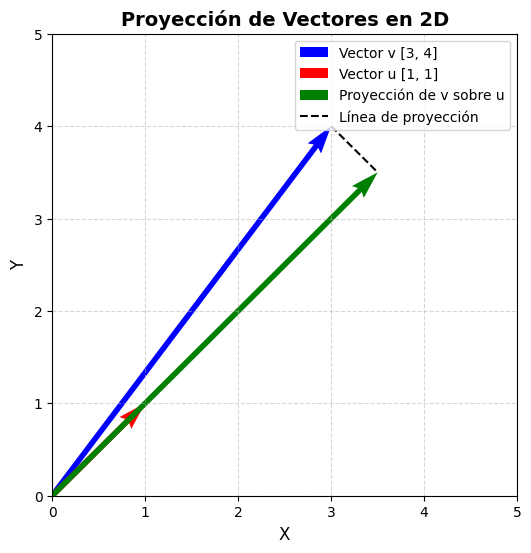

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir vectores
v = np.array([3, 4])
u = np.array([1, 1])

# Normalizar u
u_norm = u / np.linalg.norm(u)

# Calcular la proyección de v sobre u
proj_v_on_u = np.dot(v, u_norm) * u_norm

# Visualización en 2D
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.012, label='Vector v [3, 4]')
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.012, label='Vector u [1, 1]')
plt.quiver(0, 0, proj_v_on_u[0], proj_v_on_u[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.012, label='Proyección de v sobre u')
plt.plot([v[0], proj_v_on_u[0]], [v[1], proj_v_on_u[1]], 'k--', label='Línea de proyección')

# Ajustes adicionales para la visualización
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Proyección de Vectores en 2D', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

**Interpretación**

- **Visualización**: El gráfico muestra cómo el vector $(\mathbf{v})$ se proyecta en la dirección del vector $(\mathbf{u})$, con la proyección indicada en verde. Esto ilustra visualmente cómo se "reduce" el vector $(\mathbf{v})$ a su componente a lo largo de $(\mathbf{u})$.

Este tipo de proyección es crucial para entender cómo los componentes de un sistema pueden ser descompuestos en términos de bases más simples, facilitando análisis en todo, desde ingeniería hasta economía y ciencias de la computación.

### **14.1.8 Proyecciones ortogonales**

Las **proyecciones ortogonales** son un concepto fundamental en álgebra lineal y geometría analítica, utilizadas ampliamente para descomponer vectores en componentes que son paralelos y perpendiculares a un subespacio dado. Este concepto es crucial en muchas aplicaciones, incluyendo la solución de sistemas de ecuaciones, optimización, y el procesamiento de señales y datos.

**Concepto de Proyección Ortogonal**

La proyección ortogonal de un vector sobre un subespacio es el punto en ese subespacio que está más cerca del vector original. Matemáticamente, si tenemos un vector $(\mathbf{v})$ y un subespacio $(S)$ definido por una base de vectores, la proyección ortogonal es el vector en $(S)$ que minimiza la distancia entre $(\mathbf{v})$ y cualquier vector en $(S)$.

**Fórmula de la Proyección Ortogonal**

Supongamos que el subespacio $(S)$ está definido por vectores base $(\mathbf{u}_1, \mathbf{u}_2, ..., \mathbf{u}_k)$. Si formamos una matriz $(U)$ cuyas columnas son estos vectores base, la proyección ortogonal $(\mathbf{p})$ de $(\mathbf{v})$ en $(S)$ puede calcularse usando la fórmula:

$\mathbf{p} = U (U^T U)^{-1} U^T \mathbf{v}$

Este cálculo garantiza que la diferencia $(\mathbf{v} - \mathbf{p})$ es ortogonal a todos los vectores en $(S)$.

**Ejemplo con Cálculo**

**Ejemplo**: Proyectemos el vector $\mathbf{v} = [1, 2, 3]$ sobre el plano definido por los vectores $\mathbf{u}_1 = [1, 0, 0]$ y $\mathbf{u}_2 = [0, 1, 0]$.

**Construir la Matriz $(U)$**:

   $U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}$

**Proyección Ortogonal**:

   $U^T U = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

   $(U^T U)^{-1} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

   $U^T \mathbf{v} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$

   $\mathbf{p} = U (U^T U)^{-1} U^T \mathbf{v} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 0 \end{bmatrix}$

**Código en Python y Visualización**

Vamos a implementar esta proyección ortogonal en Python y visualizar el resultado.

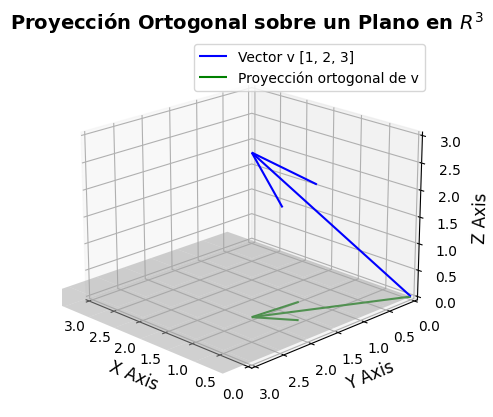

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el vector v y la matriz U
v = np.array([1, 2, 3])
U = np.array([[1, 0], [0, 1], [0, 0]])

# Calcular la proyección ortogonal
projection_matrix = U @ np.linalg.inv(U.T @ U) @ U.T
p = projection_matrix @ v

# Visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', label='Vector v [1, 2, 3]', linewidth=1.5)
ax.quiver(0, 0, 0, p[0], p[1], p[2], color='green', label='Proyección ortogonal de v', linewidth=1.5)

# Dibujar el plano representativo del subespacio U
xx, yy = np.meshgrid(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, color='lightgrey', alpha=0.5)

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_xlabel('X Axis', fontsize=12)
ax.set_ylabel('Y Axis', fontsize=12)
ax.set_zlabel('Z Axis', fontsize=12)
ax.set_title('Proyección Ortogonal sobre un Plano en $R^3$', fontsize=14, fontweight='bold')
ax.legend()
ax.view_init(elev=20, azim=135)  # Ajuste de la perspectiva
plt.show()

**Interpretación**

- **Visualización**: La gráfica muestra claramente el vector original $(\mathbf{v})$ y su proyección ortogonal en el plano XY, destacada en verde.

- **Cálculo**: Este script configura correctamente la matriz de proyección y calcula la proyección del vector $(\mathbf{v})$, demostrando cómo $(\mathbf{v})$ es reducido a sus componentes en el plano definido.

Proyecciones ortogonales son esenciales para simplificar problemas en muchas aplicaciones técnicas y científicas, incluyendo análisis de señales, reducción de dimensionalidad en machine learning, y más.

| **Inicio** | **atrás 13** | **Siguiente 15** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./13_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)| [⏩](./15_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|